In [1]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, CRD, DCD2
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
u = mda.Universe('step3_charmm2namd.psf', 'step5_2.dcd')

In [4]:
aligner = align.AlignTraj(u, u, select='name CA',
                          in_memory=True).run()

In [5]:
matrix = diffusionmap.DistanceMatrix(u, select='name CA').run()
matrix.dist_matrix.shape

(10, 10)

Text(0.5, 1.0, '5ulspH2')

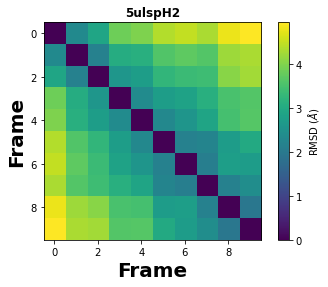

In [19]:
fig1 = plt.imshow(matrix.dist_matrix, cmap='viridis')  #vmin=0,vmax=6 (to set min and max scaler)
plt.xlabel('Frame' , weight='bold' , fontsize=20)
plt.ylabel('Frame' , weight='bold' , fontsize=20)
plt.colorbar(label=r'RMSD ($\AA$)')

plt.title('5ulspH2' , weight='bold')

In [21]:
fig1.figure.savefig('5ulspH2testing.tif', bbox_inches='tight', dpi=1200)

The first part is done ie. 2D analysis within a trajectory. Now let's consider calculating within 2 trajectories open and closed. 
 

In [28]:
adk_open = mda.Universe('step3_charmm2namd.psf', 'step5_1.dcd')
adk_closed = mda.Universe('step3_charmm2namd.psf', 'step5_2.dcd')

In [29]:
prmsd = np.zeros((len(adk_open.trajectory),  # y-axis
                  len(adk_closed.trajectory)))  # x-axis
print(prmsd)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
for i, frame_open in enumerate(adk_open.trajectory):
    r = rms.RMSD(adk_closed, adk_open, select='name CA',
                 ref_frame=i).run()
    prmsd[i] = r.rmsd[:, -1]  # select 3rd column with RMSD values

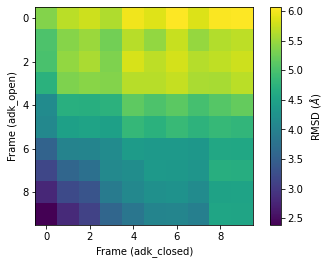

In [31]:
plt.imshow(prmsd, cmap='viridis')
plt.xlabel('Frame (adk_closed)')
plt.ylabel('Frame (adk_open)')
plt.colorbar(label=r'RMSD ($\AA$)')